# Market Overview Notebook

In [1]:
# %matplotlib tk

In [2]:
from utils import gold_silv_ratio, fear_n_greed_idx, vix, bitcoin, gold_silver, snp500, bonds, print_indicators

In [3]:
print_indicators(continuous_update=False)

Current VIX: 14.87
Stable market conditions.


Fear & Greed Index Value: 62.91
Market Sentiment: greed

Fear and Greed Ranges:
_______________________

Extreme Fear:	0 - 25
Fear:		25 - 50
Neutral:	50
Greed:		50 - 75
Extreme Greed:	75 - 100


In [4]:
import datetime
TIME_RANGE = [datetime.date(2024, 1, 1) , datetime.date.today()]

## S&P 500

Current S&P 500 Index: 6434.51


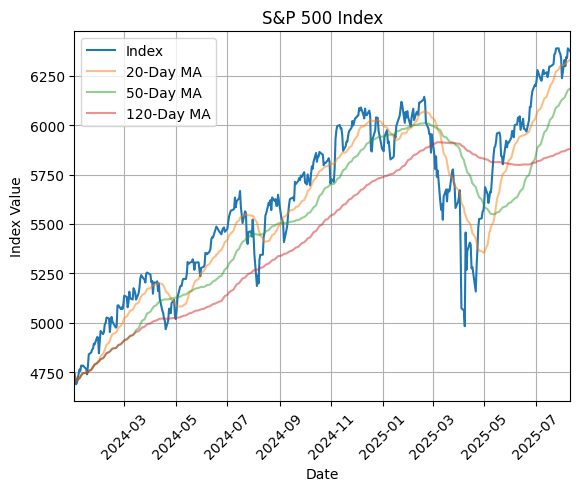

In [5]:
snp_data = snp500(TIME_RANGE)

## Bonds

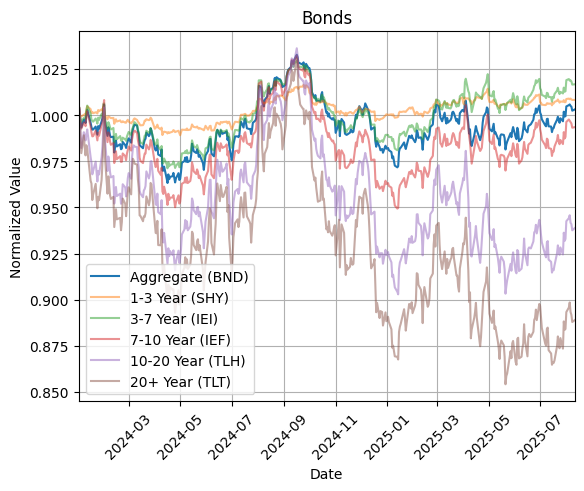

In [6]:
bnd_data = bonds(TIME_RANGE)

## Fear & Greed Index

In [7]:
_ = fear_n_greed_idx()

Fear & Greed Index Value: 62.91
Market Sentiment: greed

Fear and Greed Ranges:
_______________________

Extreme Fear:	0 - 25
Fear:		25 - 50
Neutral:	50
Greed:		50 - 75
Extreme Greed:	75 - 100


## Volatility Index

Current VIX: 14.87
Lowest Value: 10.62
Highest Value: 65.73
Stable market conditions.


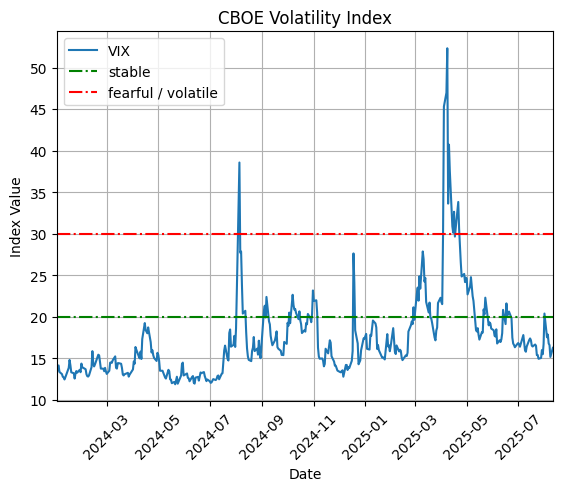

In [8]:
vix_idx = vix(TIME_RANGE)

## Gold / Silver


Gold: $3400.00 per ounce
Silver: $37.98 per ounce
Gold/Silver Ratio: 89.52
Silver likely undervalued.
Gold
_____
Highest Value: 3485.60
Lowest Value: 1045.20
Silver
_____
Highest Value: 49.52
Lowest Value: 11.73


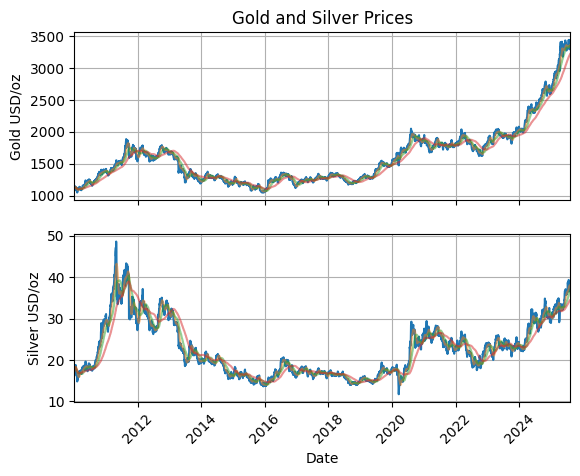

In [9]:
gld_slv_ratio = gold_silv_ratio()
precious_metal_time_range = [datetime.date(2010, 1, 1), datetime.date.today()]
gld_data, slv_data = gold_silver(precious_metal_time_range)

## Bitcoin

Current Bitcoin Price (USD): 119823.93
Lowest Price: 38521.89
Highest Price: 123091.61


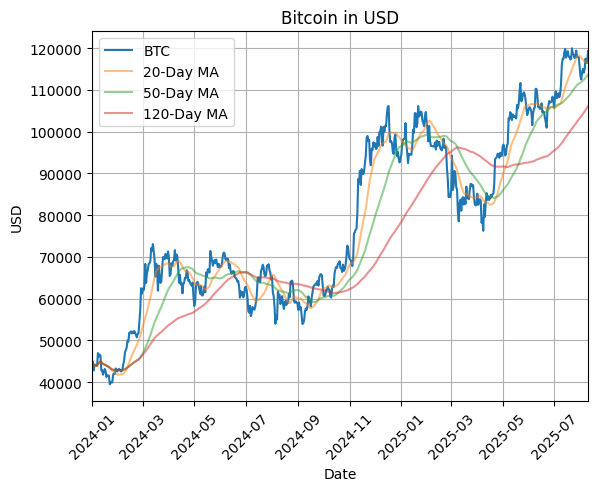

In [10]:
bitcoin_data = bitcoin(TIME_RANGE)

/tmp/ipykernel_856024/3888755513.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


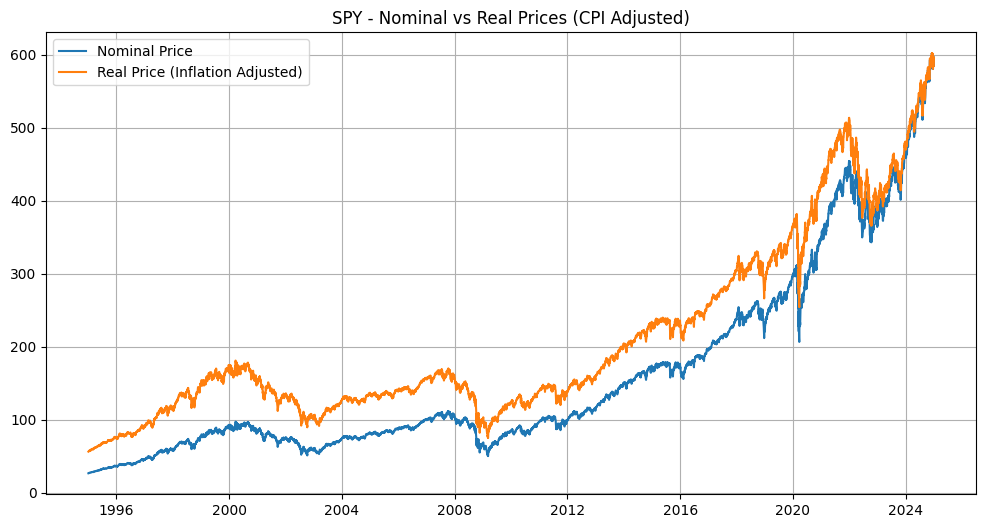

In [11]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

# Parameters
ticker = 'SPY'
start_date = '1995-01-01'
end_date = '2024-12-31'

# 1. Download SPY price (get as Series)
prices = yf.download(ticker, start=start_date, end=end_date)['Close']
if isinstance(prices, pd.DataFrame):  # defensive check
    prices = prices.iloc[:, 0]  # or .squeeze()

# 2. Download CPI data from FRED
cpi = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)
cpi.columns = ['CPI']

# 3. Align CPI to price
cpi_daily = cpi.resample('D').ffill()
cpi_aligned = cpi_daily.reindex(prices.index, method='ffill')

# 4. Inflation adjustment
base_cpi = cpi_aligned.iloc[-1]['CPI']
real_prices = prices * (base_cpi / cpi_aligned['CPI'])

# 5. Plot
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Nominal Price')
plt.plot(real_prices, label='Real Price (Inflation Adjusted)')
plt.title(f'{ticker} - Nominal vs Real Prices (CPI Adjusted)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()